In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [ ]:
#data pre prossesing

In [4]:
data.shape

(7920, 3)

In [7]:
data.duplicated().sum()

np.int64(0)

In [12]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

# text preprossesing

In [13]:
import re
import string

In [14]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

#convert uppercase to lower case

In [15]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [16]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

#remove links

In [17]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [18]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

#Remove punctuations

In [19]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [22]:
data["tweet"].head(25)

0     fingerprint pregnancy test  android apps beaut...
1     finally a transparant silicon case  thanks to ...
2     we love this would you go talk makememories un...
3     im wired i know im george i was made that way ...
4     what amazing service apple wont even talk to m...
5     iphone software update fucked up my phone big ...
6     happy for us  instapic instadaily us sony xper...
7     new type c charger cable uk  … bay amazon etsy...
8     bout to go shopping again listening to music i...
9     photo fun selfie pool water sony camera picoft...
10    hey apple when you make a new ipod dont make i...
11    ha not heavy machinery but it does what i need...
12    contemplating giving in to the iphone bandwago...
13    i just made another crazy purchase lol my theo...
14    shaqlockholmes samlouise1991 the battery is so...
15    from deepellum towards downtown dallas bigd sa...
16    like and share if you want this 3d phone case ...
17    go crazy  iphonesia iphone instagood insta

In [23]:
data["tweet"].tail(15)

7905    ove a fist inside my  oh god i a fist inside m...
7906    legit feels like i have a brand new phone appl...
7907    tipsy rhymes with e ye we je mi ne donts miss ...
7908    second fucking time stay on hold for 30 mins a...
7909    rt monteithelgort first post from my new phone...
7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [ ]:
#remove numbers

In [24]:
data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)

In [25]:
data["tweet"].tail(15)

7905    ove a fist inside my  oh god i a fist inside m...
7906    legit feels like i have a brand new phone appl...
7907    tipsy rhymes with e ye we je mi ne donts miss ...
7908    second fucking time stay on hold for  mins and...
7909    rt monteithelgort first post from my new phone...
7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

#remove stopwords

In [26]:
!pip install nltk

     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     --------------------------- ---------- 30.7/42.0 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 511.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.5 MB 2.0 MB/s eta 0:00:01
   ---- ----------------------------------- 0.2/1.5 MB 1.5 MB/s eta 0:00:01
   ----- ---------------------------------- 0.2/1.5 MB 2.1 MB/s eta 0:00:01
   -------- ------------------------------- 0.3/1.5 MB 1.9 MB/s eta 0:00:01
   --------- ------------------------------ 0.4/1.5 MB 1.8 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.5 MB 2.5 MB/s eta 0:00:01
   ----------------------- ---------------- 0.9/1.5 MB 2.9 MB/s eta 0:00:01
   ------------------------------- -------- 1.2/1.5 MB 3.6 MB/s eta 0:00:01
   ---------------------------------------  1.5/1.5 MB 4.1 MB/s eta 0:00:01
   ------------


[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import nltk

In [28]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [29]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [30]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [32]:
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

In [ ]:
#Stemming

In [33]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [34]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [35]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [36]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


#build vocabulary 

In [37]:
from collections import Counter
vocab = Counter()

In [38]:
vocab

Counter()

In [39]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [40]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [41]:
len(vocab)

15949

In [42]:
data.shape

(7920, 3)

In [43]:
tokens = [key for key in vocab if vocab[key] > 10]

In [44]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [47]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

In [46]:
len(tokens)

1145

#Divide dataset

In [48]:
X = data['tweet']
y = data['label']

In [50]:
X

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [52]:
y

0       0
1       0
2       0
3       0
4       1
       ..
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: int64

In [53]:
!pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.8 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.8 kB ? eta -:--:--
     -------------------------------------- 60.8/60.8 kB 459.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 5.5 MB/s eta 0:00:02
    --------------------------------------- 0.2/11.0 MB 2.5 MB/s eta 0:00:05
    --------------------------------------- 0.2/11.0 MB 2.8 MB/s eta 0:00:04
   - -------------------------------------- 0.3/11.0 MB 2.3 MB/s eta 0:00:05
   - -------------------------------------- 0.4/11.0 MB 2.1 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/11.0 MB 2.6 MB/s eta 0:00:05
   --- ------------------------------------ 0.9/11.0 MB 3.1 MB/s eta 0:00:04
   ---- ----------------------------------- 1.1/11.0 MB 3.4 MB/s eta 0:00:03
   ---- --------


[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [63]:
X_train.shape

(6336,)

In [55]:
X_train

4526    garden — steemit … garden home warm hot green ...
2703    that’ amaz morocco shot sonyalpha arii use son...
4086        use promo code susanko box iphon case fit fir
4570    there reason dont like appl product itun ripof...
6490       everi appl product ever own fuck suck ass appl
                              ...                        
5639             hot–kid iphon window phone comput hotkid
2938    leigh bought samsung tablet yesterday samsung ...
766                      updat phone youtub app get delet
3065    appl itun shit hour creat playlist ipod look i...
7860    “you dont take photograph make it” capsul coll...
Name: tweet, Length: 6336, dtype: object

In [56]:
X_test

911            appl shop visit need volum button go break
7891    new dress thank momma appl dress littleblackdr...
1211    love new smart phone samsung edg black edit sm...
3240    much love much lol playlist music rain cold ip...
1996    hunt — steemit … hunt garden new life home sto...
                              ...                        
1294    need inspir new articl blog ur vote tech natur...
7427    need new run playlist cant connect itun laptop...
1509         got ipod g fuck io appl io ipod appl fuckyou
5985    fuzzi effect tagsforlik tfler instagood tweegr...
3242    love sayang rt egveronica wufffyouuu jsade boy...
Name: tweet, Length: 1584, dtype: object

In [57]:
y_train

4526    0
2703    0
4086    0
4570    1
6490    1
       ..
5639    0
2938    0
766     1
3065    1
7860    0
Name: label, Length: 6336, dtype: int64

#Vectorization

In [65]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [66]:
vectorized_x_train = vectorizer(X_train, tokens)

In [67]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [68]:
vectorized_x_test = vectorizer(X_test, tokens)

In [70]:
y_test

911     0
7891    0
1211    0
3240    0
1996    0
       ..
1294    0
7427    1
1509    1
5985    0
3242    0
Name: label, Length: 1584, dtype: int64

In [72]:
y_train.value_counts()

label
0    4731
1    1605
Name: count, dtype: int64

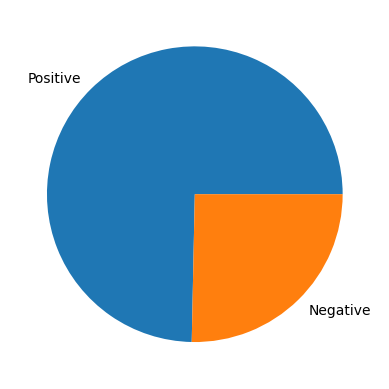

In [73]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [ ]:
#Handle imbalanced dataset

In [74]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/258.3 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/258.3 kB ? eta -:--:--
   ---------------- --------------------- 112.6/258.3 kB 930.9 kB/s eta 0:00:01
   ---------------- --------------------- 112.6/258.3 kB 930.9 kB/s eta 0:00:01
   -------------------------------------- - 245.8/258.3 kB 1.2 MB/s eta 0:00:01
   -------------------------------------- 258.3/258.3 kB 932.6 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [75]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9462, 1145) (9462,)


In [76]:
y_train_smote.value_counts()

label
0    4731
1    4731
Name: count, dtype: int64

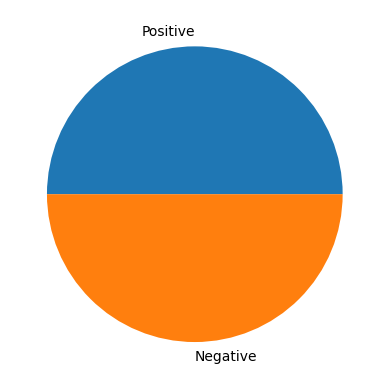

In [77]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [78]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [79]:
y_train_smote

0       0
1       0
2       0
3       1
4       1
       ..
9457    1
9458    1
9459    1
9460    1
9461    1
Name: label, Length: 9462, dtype: int64

In [80]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [81]:
y_test

911     0
7891    0
1211    0
3240    0
1996    0
       ..
1294    0
7427    1
1509    1
5985    0
3242    0
Name: label, Length: 1584, dtype: int64

#Model Training and Evaluation

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [83]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

#Logistic Regression

In [84]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

LogisticRegression()

In [85]:
y_train_pred = lr.predict(vectorized_x_train_smote)

In [86]:
y_train_pred

array([0, 0, 0, ..., 1, 1, 1])

In [87]:
y_train_smote

0       0
1       0
2       0
3       1
4       1
       ..
9457    1
9458    1
9459    1
9460    1
9461    1
Name: label, Length: 9462, dtype: int64

In [88]:
training_scores(y_train_smote, y_train_pred)

Training Scores:
	Accuracy = 0.938
	Precision = 0.913
	Recall = 0.969
	F1-Score = 0.94


In [89]:
y_test_pred = lr.predict(vectorized_x_test)

In [90]:
y_test_pred

array([1, 0, 0, ..., 1, 0, 0])

In [91]:
y_test

911     0
7891    0
1211    0
3240    0
1996    0
       ..
1294    0
7427    1
1509    1
5985    0
3242    0
Name: label, Length: 1584, dtype: int64

In [92]:
validation_scores(y_test, y_test_pred)

Testing Scores:
	Accuracy = 0.874
	Precision = 0.732
	Recall = 0.829
	F1-Score = 0.777


#Naive Bayes

In [93]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.904
	Precision = 0.867
	Recall = 0.955
	F1-Score = 0.909
Testing Scores:
	Accuracy = 0.881
	Precision = 0.713
	Recall = 0.922
	F1-Score = 0.804


#Decision Tree

In [94]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.838
	Precision = 0.706
	Recall = 0.672
	F1-Score = 0.689


#Random Forest

In [95]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.876
	Precision = 0.786
	Recall = 0.734
	F1-Score = 0.759


#Support Vector Machine

In [96]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.978
	Precision = 0.96
	Recall = 0.997
	F1-Score = 0.978
Testing Scores:
	Accuracy = 0.886
	Precision = 0.764
	Recall = 0.824
	F1-Score = 0.793


In [97]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)